#70

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2023-06-24 03:43:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas     [     <=>            ]  27.87M  32.7MB/s    in 0.9s    

2023-06-24 03:43:43 (32.7 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [2]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換、'\''はエスケープされたシングルクオーテーション
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

# データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

# データの分割,train,testの順に返す。stratifyで均等に分割したい要素を指定(多くは正解データ)
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

# データの保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())


【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [4]:
#このセルでは特徴量の次元揃えるためにfeature_names(別名nameoftrain)を作成、試しに全データの特徴量を表示
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
nameoftrain = ""
corpus=[]

for index, tra in df.iterrows():
  corpus.append(tra['TITLE'])
vectorizer = TfidfVectorizer()#tfidfを用いた特徴量

vec = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
nameoftrain = feature_names
feature = pd.DataFrame(vec.toarray(), columns=feature_names)
display(feature)

,00,07,08,09,0ff,0ut,10,100,1000,10000,...,zone,zooey,zoosk,zuckerberg,zynga,zâ,œf,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#特徴量生成関数を定義ただし08では使用しない
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def feature_value(t):
  corpus=[]

  for index, tra in t.iterrows():
    corpus.append(tra['TITLE'])
  vectorizer = TfidfVectorizer()#tfidfを用いた特徴量

  vec = vectorizer.fit_transform(corpus)
  feature_names = vectorizer.get_feature_names_out()
  feature = pd.DataFrame(vec.toarray(), columns=feature_names)
  for i in nameoftrain:#次元揃えるために全データの単語を扱う
    if not(i in  feature_names):
      feature[i] = 0
  display(feature)
  feature = feature.sort_index(axis=1)#後々のための昇順ソートしておく
  return feature

In [6]:
#こんな感じで使用
print(type(feature_value(train)))


<ipython-input-5-97508e33f392>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-5-97508e33f392>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-input-5-97508e33f392>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature[i] = 0
<ipython-inpu

,00,07,08,09,0ff,0ut,10,100,1000,10000,...,wrists,xl,xu,yanking,yorker,yovanna,zack,zebras,zombies,zâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>


In [7]:
import gdown
from gensim.models import KeyedVectors

# 学習済み単語ベクトルのダウンロード
url = "https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM"
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=True)

# ダウンロードファイルのロード
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [8]:
import string
import torch

def transform_w2v(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  words = text.translate(table).split()  # 記号をスペースに置換後、スペースで分割してリスト化
  vec = [model[word] for word in words if word in model]  # 1語ずつベクトル化

  return torch.tensor(sum(vec) / len(vec))  # 平均ベクトルをTensor型に変換して出力

# 特徴ベクトルの作成
X_train = torch.stack([transform_w2v(text) for text in train['TITLE']])
X_valid = torch.stack([transform_w2v(text) for text in valid['TITLE']])
X_test = torch.stack([transform_w2v(text) for text in test['TITLE']])

print(X_train.size())
print(X_train)

torch.Size([10684, 300])
tensor([[ 0.0837,  0.0056,  0.0068,  ...,  0.0751,  0.0433, -0.0868],
        [ 0.0272,  0.0266, -0.0947,  ..., -0.1046, -0.0489, -0.0092],
        [ 0.0577, -0.0159, -0.0780,  ..., -0.0421,  0.1229,  0.0876],
        ...,
        [ 0.0392, -0.0052,  0.0686,  ..., -0.0175,  0.0061, -0.0224],
        [ 0.0798,  0.1017,  0.1066,  ..., -0.0752,  0.0623,  0.1138],
        [ 0.1664,  0.0451,  0.0508,  ..., -0.0531, -0.0183, -0.0039]])


In [9]:
#行列データのラベル生成
Y_train=[]
Y_valid=[]
Y_test=[]
for i in range(len(train['CATEGORY'])):
  if(train['CATEGORY'].iloc[i]=='b'):
    Y_train.append(0)
  if(train['CATEGORY'].iloc[i]=='t'):
    Y_train.append(1)
  if(train['CATEGORY'].iloc[i]=='e'):
    Y_train.append(2)
  if(train['CATEGORY'].iloc[i]=='m'):
    Y_train.append(3)
Y_train=pd.Series(Y_train)

for i in range(len(test['CATEGORY'])):
  if(test['CATEGORY'].iloc[i]=='b'):
    Y_test.append(0)
  if(test['CATEGORY'].iloc[i]=='t'):
    Y_test.append(1)
  if(test['CATEGORY'].iloc[i]=='e'):
    Y_test.append(2)
  if(test['CATEGORY'].iloc[i]=='m'):
    Y_test.append(3)
Y_test=pd.Series(Y_test)

for i in range(len(valid['CATEGORY'])):
  if(valid['CATEGORY'].iloc[i]=='b'):
    Y_valid.append(0)
  if(valid['CATEGORY'].iloc[i]=='t'):
    Y_valid.append(1)
  if(valid['CATEGORY'].iloc[i]=='e'):
    Y_valid.append(2)
  if(valid['CATEGORY'].iloc[i]=='m'):
    Y_valid.append(3)
Y_valid=pd.Series(Y_valid)

Y_train=torch.tensor(Y_train)
Y_test=torch.tensor(Y_test)
Y_valid=torch.tensor(Y_valid)

In [10]:
print(Y_train)
print(Y_train.size())

tensor([0, 1, 3,  ..., 0, 3, 2])
torch.Size([10684])


# 71

In [11]:
from torch import nn

class SLPNet(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.fc = nn.Linear(input_size, output_size, bias=False)
    nn.init.normal_(self.fc.weight, 0.0, 1.0)  # 正規乱数で重みを初期化

  def forward(self, x):
    x = self.fc(x)
    return x

In [12]:
model = SLPNet(300, 4)  # 単層ニューラルネットワークの初期化
y_hat_1 = torch.softmax(model(X_train[:1]), dim=-1)#質問：このdim=-1は何なぜ-1
print(y_hat_1)

tensor([[0.0935, 0.3903, 0.1301, 0.3861]], grad_fn=<SoftmaxBackward0>)


In [13]:
Y_hat = torch.softmax(model.forward(X_train[:4]), dim=-1)
print(Y_hat)

tensor([[0.0935, 0.3903, 0.1301, 0.3861],
        [0.0425, 0.1270, 0.1108, 0.7197],
        [0.7547, 0.0342, 0.0196, 0.1915],
        [0.3440, 0.2101, 0.0769, 0.3690]], grad_fn=<SoftmaxBackward0>)


# 72

In [14]:
criterion = nn.CrossEntropyLoss()

l_1 = criterion(model(X_train[:1]), Y_train[:1])  # 入力ベクトルはsoftmax前の値
model.zero_grad()  # 勾配をゼロで初期化
l_1.backward()  # 勾配を計算
print(f'損失: {l_1:.4f}')
print(f'勾配:\n{model.fc.weight.grad}')

損失: 2.3697
勾配:
tensor([[-0.0758, -0.0051, -0.0062,  ..., -0.0681, -0.0393,  0.0787],
        [ 0.0326,  0.0022,  0.0027,  ...,  0.0293,  0.0169, -0.0339],
        [ 0.0109,  0.0007,  0.0009,  ...,  0.0098,  0.0056, -0.0113],
        [ 0.0323,  0.0022,  0.0026,  ...,  0.0290,  0.0167, -0.0335]])


In [15]:
l = criterion(model(X_train[:4]), Y_train[:4])
model.zero_grad()
l.backward()
print(f'損失: {l:.4f}')
print(f'勾配:\n{model.fc.weight.grad}')

損失: 2.1629
勾配:
tensor([[-0.0126,  0.0003, -0.0119,  ..., -0.0272,  0.0162,  0.0343],
        [-0.0002, -0.0028,  0.0239,  ...,  0.0291,  0.0180, -0.0068],
        [ 0.0166, -0.0106, -0.0171,  ...,  0.0025, -0.0083,  0.0021],
        [-0.0038,  0.0131,  0.0051,  ..., -0.0043, -0.0259, -0.0297]])


# 73

In [16]:
from torch.utils.data import Dataset

class NewsDataset(Dataset):
  def __init__(self, X, y):  # datasetの構成要素を指定
    self.X = X
    self.y = y

  def __len__(self):  # len(dataset)で返す値を指定
    return len(self.y)

  def __getitem__(self, idx):  # dataset[idx]で返す値を指定
    return [self.X[idx], self.y[idx]]

In [17]:
from torch.utils.data import DataLoader

# Datasetの作成
dataset_train = NewsDataset(X_train, Y_train)
dataset_valid = NewsDataset(X_valid, Y_valid)
dataset_test = NewsDataset(X_test, Y_test)

# Dataloaderの作成
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)


In [18]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習、エポックは全データを何周するか10だから学習データ１０周
num_epochs = 10
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  loss_train = 0.0
  for i, (inputs, labels) in enumerate(dataloader_train):
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # 損失を記録
    loss_train += loss.item()

  # バッチ単位の平均損失計算
  loss_train = loss_train / i

  # 検証データの損失計算
  model.eval()
  with torch.no_grad():
    inputs, labels = next(iter(dataloader_valid))#１バッチ分取り出すため、バッチサイズの定義的に全ての評価データを取り出している
    outputs = model(inputs)
    loss_valid = criterion(outputs, labels)

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, loss_valid: {loss_valid:.4f}')

epoch: 1, loss_train: 0.4867, loss_valid: 0.3611
epoch: 2, loss_train: 0.3176, loss_valid: 0.3283
epoch: 3, loss_train: 0.2863, loss_valid: 0.3191
epoch: 4, loss_train: 0.2693, loss_valid: 0.3095
epoch: 5, loss_train: 0.2587, loss_valid: 0.3083
epoch: 6, loss_train: 0.2515, loss_valid: 0.3063
epoch: 7, loss_train: 0.2451, loss_valid: 0.3065
epoch: 8, loss_train: 0.2404, loss_valid: 0.3052
epoch: 9, loss_train: 0.2373, loss_valid: 0.3085
epoch: 10, loss_train: 0.2342, loss_valid: 0.3078


# 74

In [19]:
def calculate_accuracy(model, loader):
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)#テンソルの最後の次元を指定 dim=-1で
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return correct / total



acc_train = calculate_accuracy(model, dataloader_train)
acc_test = calculate_accuracy(model, dataloader_test)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')

正解率（学習データ）：0.924
正解率（評価データ）：0.900


# 75

In [21]:
def calculate_loss_and_accuracy(model, criterion, loader):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total

In [22]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 30
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for inputs, labels in dataloader_train:
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')

epoch: 1, loss_train: 0.3277, accuracy_train: 0.8871, loss_valid: 0.3523, accuracy_valid: 0.8750
epoch: 2, loss_train: 0.2863, accuracy_train: 0.8999, loss_valid: 0.3259, accuracy_valid: 0.8855
epoch: 3, loss_train: 0.2639, accuracy_train: 0.9114, loss_valid: 0.3119, accuracy_valid: 0.8870
epoch: 4, loss_train: 0.2498, accuracy_train: 0.9160, loss_valid: 0.3050, accuracy_valid: 0.8960
epoch: 5, loss_train: 0.2468, accuracy_train: 0.9164, loss_valid: 0.3095, accuracy_valid: 0.8952
epoch: 6, loss_train: 0.2380, accuracy_train: 0.9185, loss_valid: 0.3071, accuracy_valid: 0.8930
epoch: 7, loss_train: 0.2367, accuracy_train: 0.9189, loss_valid: 0.3086, accuracy_valid: 0.8930
epoch: 8, loss_train: 0.2309, accuracy_train: 0.9233, loss_valid: 0.3047, accuracy_valid: 0.8915
epoch: 9, loss_train: 0.2249, accuracy_train: 0.9246, loss_valid: 0.3041, accuracy_valid: 0.8960
epoch: 10, loss_train: 0.2235, accuracy_train: 0.9248, loss_valid: 0.3061, accuracy_valid: 0.8937
epoch: 11, loss_train: 0.2243

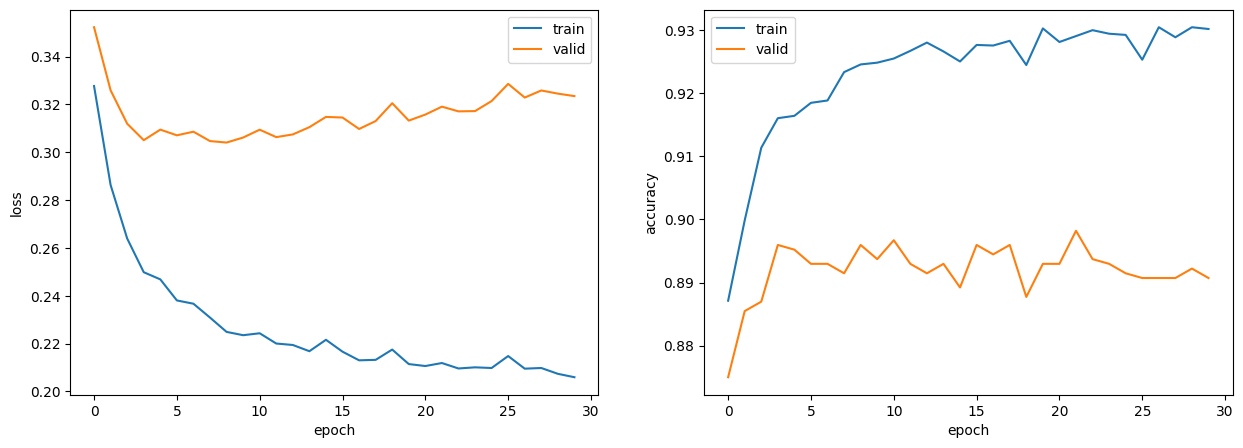

In [27]:
from matplotlib import pyplot as plt
import numpy as np
# 視覚化
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log_train).T[0], label='train')
ax[0].plot(np.array(log_valid).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log_train).T[1], label='train')
ax[1].plot(np.array(log_valid).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

# 76

In [28]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 10
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for inputs, labels in dataloader_train:
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # チェックポイントの保存
  torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')


epoch: 1, loss_train: 0.3330, accuracy_train: 0.8851, loss_valid: 0.3616, accuracy_valid: 0.8855
epoch: 2, loss_train: 0.2900, accuracy_train: 0.9031, loss_valid: 0.3298, accuracy_valid: 0.8907
epoch: 3, loss_train: 0.2713, accuracy_train: 0.9060, loss_valid: 0.3245, accuracy_valid: 0.8915
epoch: 4, loss_train: 0.2548, accuracy_train: 0.9119, loss_valid: 0.3122, accuracy_valid: 0.8907
epoch: 5, loss_train: 0.2457, accuracy_train: 0.9153, loss_valid: 0.3084, accuracy_valid: 0.8937
epoch: 6, loss_train: 0.2441, accuracy_train: 0.9164, loss_valid: 0.3104, accuracy_valid: 0.8960
epoch: 7, loss_train: 0.2347, accuracy_train: 0.9198, loss_valid: 0.3069, accuracy_valid: 0.8960
epoch: 8, loss_train: 0.2305, accuracy_train: 0.9204, loss_valid: 0.3070, accuracy_valid: 0.8952
epoch: 9, loss_train: 0.2274, accuracy_train: 0.9238, loss_valid: 0.3055, accuracy_valid: 0.8922
epoch: 10, loss_train: 0.2264, accuracy_train: 0.9232, loss_valid: 0.3100, accuracy_valid: 0.8915


# 77

In [29]:
import time

def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs):
  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec')

  return {'train': log_train, 'valid': log_valid}

In [33]:
# datasetの作成
dataset_train = NewsDataset(X_train, Y_train)
dataset_valid = NewsDataset(X_valid, Y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# モデルの学習
for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ: {batch_size}')
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1)#バッチサイズが変わってももちろんlossとかは変わらない

バッチサイズ: 1
epoch: 1, loss_train: 0.3225, accuracy_train: 0.8881, loss_valid: 0.3593, accuracy_valid: 0.8757, 6.4775sec
バッチサイズ: 2
epoch: 1, loss_train: 0.2998, accuracy_train: 0.8963, loss_valid: 0.3401, accuracy_valid: 0.8810, 2.5751sec
バッチサイズ: 4
epoch: 1, loss_train: 0.2859, accuracy_train: 0.9029, loss_valid: 0.3273, accuracy_valid: 0.8862, 1.3828sec
バッチサイズ: 8
epoch: 1, loss_train: 0.2825, accuracy_train: 0.9036, loss_valid: 0.3258, accuracy_valid: 0.8847, 0.7742sec
バッチサイズ: 16
epoch: 1, loss_train: 0.2808, accuracy_train: 0.9040, loss_valid: 0.3245, accuracy_valid: 0.8862, 0.4908sec
バッチサイズ: 32
epoch: 1, loss_train: 0.2797, accuracy_train: 0.9042, loss_valid: 0.3237, accuracy_valid: 0.8862, 0.3200sec
バッチサイズ: 64
epoch: 1, loss_train: 0.2794, accuracy_train: 0.9044, loss_valid: 0.3233, accuracy_valid: 0.8870, 0.2321sec
バッチサイズ: 128
epoch: 1, loss_train: 0.2794, accuracy_train: 0.9043, loss_valid: 0.3232, accuracy_valid: 0.8870, 0.1820sec
バッチサイズ: 256
epoch: 1, loss_train: 0.2787, accuracy_

# 78

In [34]:
def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total


def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec')

  return {'train': log_train, 'valid': log_valid}


In [35]:
# datasetの作成
dataset_train = NewsDataset(X_train, Y_train)
dataset_valid = NewsDataset(X_valid, Y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ: {batch_size}')
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1, device=device)


バッチサイズ: 1
epoch: 1, loss_train: 0.3267, accuracy_train: 0.8835, loss_valid: 0.3516, accuracy_valid: 0.8757, 13.2795sec
バッチサイズ: 2
epoch: 1, loss_train: 0.3022, accuracy_train: 0.8968, loss_valid: 0.3329, accuracy_valid: 0.8847, 5.9137sec
バッチサイズ: 4
epoch: 1, loss_train: 0.2914, accuracy_train: 0.8994, loss_valid: 0.3259, accuracy_valid: 0.8840, 2.7607sec
バッチサイズ: 8
epoch: 1, loss_train: 0.2866, accuracy_train: 0.8996, loss_valid: 0.3238, accuracy_valid: 0.8825, 1.4787sec
バッチサイズ: 16
epoch: 1, loss_train: 0.2849, accuracy_train: 0.9003, loss_valid: 0.3223, accuracy_valid: 0.8855, 0.8071sec
バッチサイズ: 32
epoch: 1, loss_train: 0.2839, accuracy_train: 0.9009, loss_valid: 0.3219, accuracy_valid: 0.8855, 0.4661sec
バッチサイズ: 64
epoch: 1, loss_train: 0.2835, accuracy_train: 0.9009, loss_valid: 0.3216, accuracy_valid: 0.8855, 0.3024sec
バッチサイズ: 128
epoch: 1, loss_train: 0.2822, accuracy_train: 0.9010, loss_valid: 0.3215, accuracy_valid: 0.8855, 0.2134sec
バッチサイズ: 256
epoch: 1, loss_train: 0.2832, accuracy

# 79

In [36]:
from torch.nn import functional as F

class MLPNet(nn.Module):
  def __init__(self, input_size, mid_size, output_size, mid_layers):
    super().__init__()
    self.mid_layers = mid_layers
    self.fc = nn.Linear(input_size, mid_size)
    self.fc_mid = nn.Linear(mid_size, mid_size)
    self.fc_out = nn.Linear(mid_size, output_size)
    self.bn = nn.BatchNorm1d(mid_size)

  def forward(self, x):
    x = F.relu(self.fc(x))
    for _ in range(self.mid_layers):
      x = F.relu(self.bn(self.fc_mid(x)))
    x = F.relu(self.fc_out(x))

    return x


In [37]:
from torch import optim

def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total


def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # スケジューラの設定
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=1e-5, last_epoch=-1)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec')

    # 検証データの損失が3エポック連続で低下しなかった場合は学習終了
    if epoch > 2 and log_valid[epoch - 3][0] <= log_valid[epoch - 2][0] <= log_valid[epoch - 1][0] <= log_valid[epoch][0]:
      break

    # スケジューラを1ステップ進める、学習率を徐々に下げる
    scheduler.step()

  return {'train': log_train, 'valid': log_valid}

In [39]:
# datasetの作成
dataset_train = NewsDataset(X_train, Y_train)
dataset_valid = NewsDataset(X_valid, Y_valid)

# モデルの定義
model = MLPNet(300, 200, 4, 1)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
log = train_model(dataset_train, dataset_valid, 64, model, criterion, optimizer, 1000, device)

epoch: 1, loss_train: 1.1323, accuracy_train: 0.5827, loss_valid: 1.1327, accuracy_valid: 0.5906, 0.5008sec
epoch: 2, loss_train: 0.7893, accuracy_train: 0.7613, loss_valid: 0.7881, accuracy_valid: 0.7657, 0.4751sec
epoch: 3, loss_train: 0.6705, accuracy_train: 0.7756, loss_valid: 0.6708, accuracy_valid: 0.7777, 0.4587sec
epoch: 4, loss_train: 0.6172, accuracy_train: 0.7811, loss_valid: 0.6191, accuracy_valid: 0.7822, 0.4957sec
epoch: 5, loss_train: 0.5800, accuracy_train: 0.7886, loss_valid: 0.5833, accuracy_valid: 0.7882, 0.4695sec
epoch: 6, loss_train: 0.5491, accuracy_train: 0.7990, loss_valid: 0.5546, accuracy_valid: 0.7964, 0.4695sec
epoch: 7, loss_train: 0.5262, accuracy_train: 0.8127, loss_valid: 0.5333, accuracy_valid: 0.8069, 0.4693sec
epoch: 8, loss_train: 0.5061, accuracy_train: 0.8207, loss_valid: 0.5152, accuracy_valid: 0.8151, 0.4605sec
epoch: 9, loss_train: 0.4885, accuracy_train: 0.8272, loss_valid: 0.4990, accuracy_valid: 0.8234, 0.5083sec
epoch: 10, loss_train: 0.474

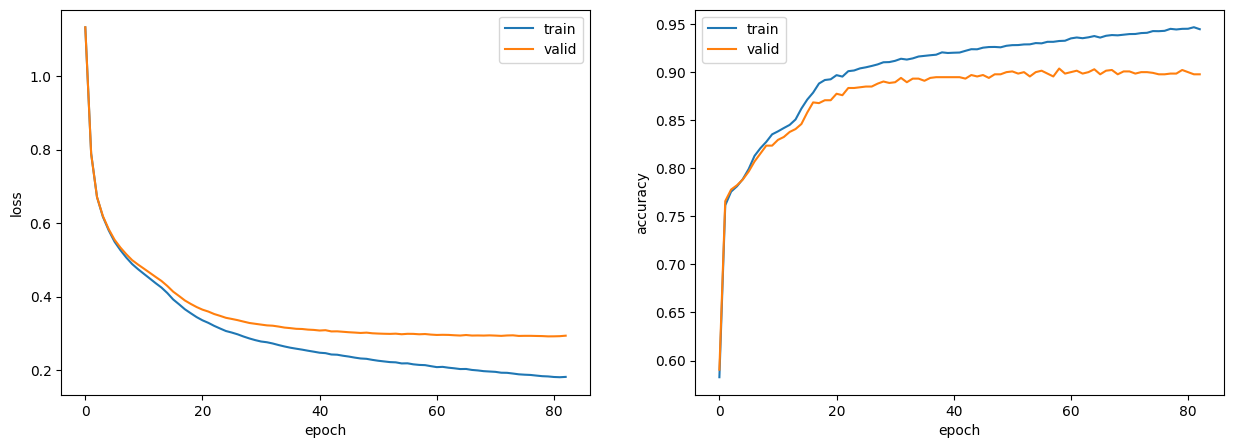

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log['train']).T[0], label='train')
ax[0].plot(np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log['train']).T[1], label='train')
ax[1].plot(np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()


多層ニューラルネットワークMLPNetを新たに定義します。このネットワークは入力層 -> 中間層 -> 出力層の構成とし、中間層のあとにバッチノーマライゼーションを行うことにします。 また、train_modelでは新たに学習の打ち切り基準を導入します。今回はシンプルに、検証データの損失が3エポック連続で低下しなかった場合に打ち切るルールとします。 さらに、学習率を徐々に下げるスケジューラも追加し、汎化性能の向上を狙います。